# ANN to Predict Ice Cream Sales using outside Temperature

* You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.

* Data set:

    * Input (X): Outside Air Temperature
    * Output (Y): Overall daily revenue generated in dollars

* This example is a regression example, we will cover regression in more details in future projects.

<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>

Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
print(f"Tensorflow Version - {tf.__version__}")

2023-07-25 19:02:09.077307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 19:02:09.825484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow Version - 2.12.0


## Load the Dataset

In [2]:
icecream = pd.read_csv('resources/SalesData.csv')
icecream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
# Check the data structure
icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
# Run summary statistice
icecream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## Data Visualizations

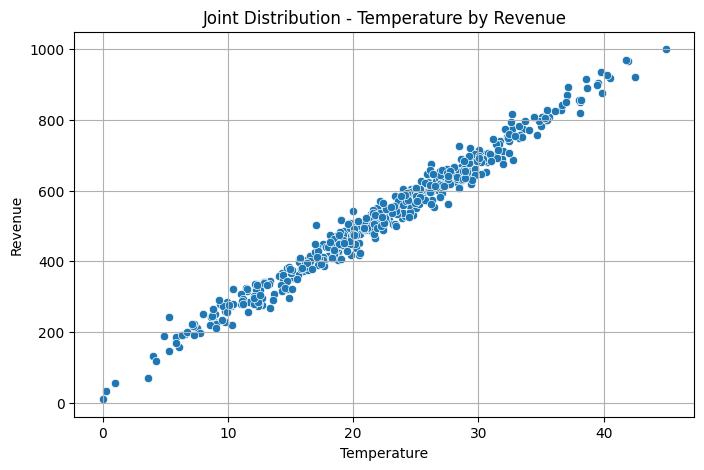

In [5]:
# Check the joint distribution between revenue and temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Revenue', data=icecream)
plt.title("Joint Distribution - Temperature by Revenue")
plt.grid(True)

/home/suvoslinux/opt/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

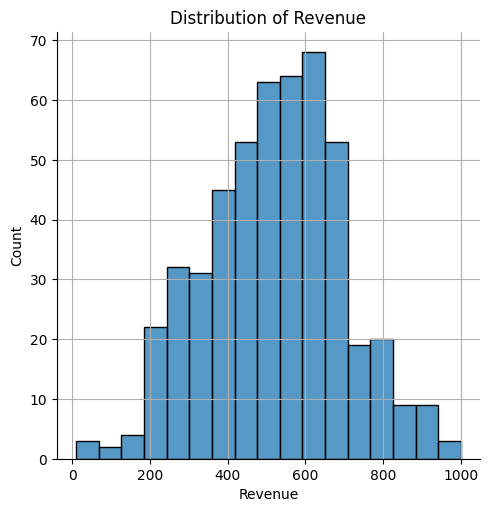

In [6]:
# Check the continuous attribute
plt.figure(figsize=(8, 5))
sns.displot(icecream['Revenue'])
plt.title("Distribution of Revenue")
plt.grid(True)

/home/suvoslinux/opt/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

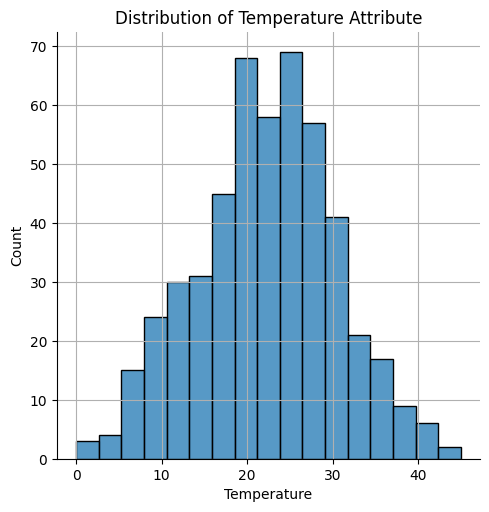

In [7]:
# Check the continuous attribute
plt.figure(figsize=(8, 5))
sns.displot(icecream['Temperature'])
plt.title("Distribution of Temperature Attribute")
plt.grid(True)

## Seggregate Training and Test Set

In [8]:
X_train = icecream['Temperature']
y_train = icecream['Revenue']

## Build and Train the Model

In [9]:
# Build the Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5), loss='mean_squared_error')

# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-07-25 19:03:46.340947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 19:03:46.367582: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 19:03:46.367655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 19:03:46.371641: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-25 19:03:46.371728: I tensorflow/compile

In [10]:
# Train the model 
# from tkinter import X


epochs_hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-07-25 19:04:19.372082: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f700001fda0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-25 19:04:19.372150: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-07-25 19:04:19.384527: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-25 19:04:19.611914: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


16/16 [==============================] - 2s 4ms/step - loss: 193380.5938
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 107463.8281

2023-07-25 19:04:19.815748: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 [==============================] - 0s 4ms/step - loss: 67911.5625
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 14803.7617
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1924.1798
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 731.4045
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 754.9579
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 701.2023
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 684.9366
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 684.6912
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 684.7771
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 682.7684
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 682.9113
Epoch 13/100
16/16 [==============================] - 0s 3ms/step - loss: 681.6125
Epoch 14/100
16/16 

## Evaluate the Model

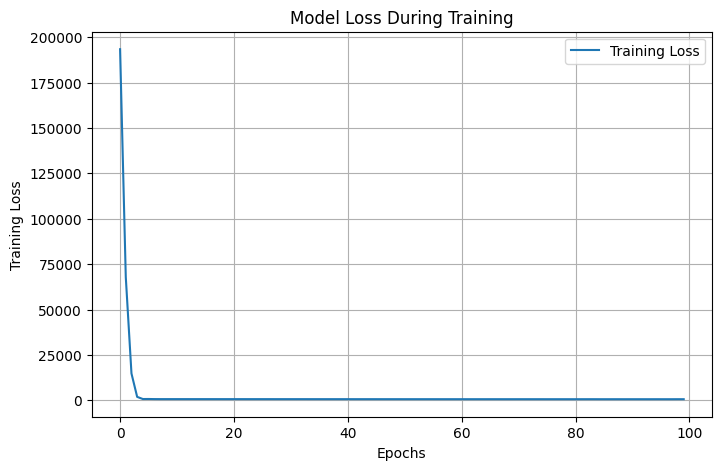

In [11]:
# Examine the loss
# Plot the Loss progress during training
plt.figure(figsize=(8, 5))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.grid(True)

In [12]:
# Check the weights
model.get_weights()

[array([[21.686003]], dtype=float32), array([40.025932], dtype=float32)]

16/16 [==============================] - 0s 2ms/step


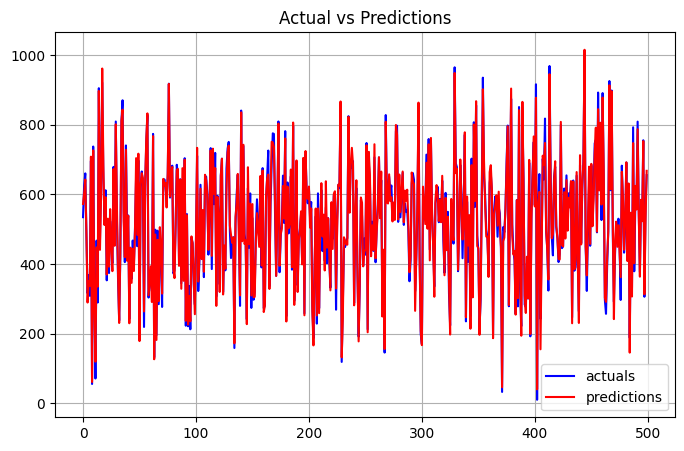

In [13]:
# We will plot the predictions vs actuals
predictions = model.predict([X_train])


plt.figure(figsize=(8, 5))
plt.plot(y_train, color='b')
plt.plot(predictions, color='r')
plt.legend(['actuals', 'predictions'])
plt.title('Actual vs Predictions')
plt.grid(True)

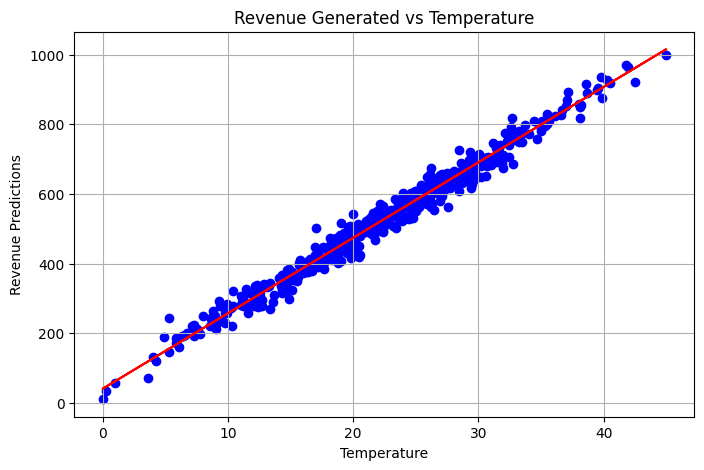

In [14]:
# Revenue Predictions vs Temperature
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, predictions, color='red')
plt.ylabel('Revenue Predictions')
plt.xlabel('Temperature')
plt.title('Revenue Generated vs Temperature')
plt.grid(True)

In [15]:
# We will use the trained model to perform prediction on an unseen data
Temp = 8
Revenue = model.predict([Temp])
print(f"Revenue Prediction for Temp 8 - {Revenue}")

1/1 [==============================] - 0s 57ms/step
Revenue Prediction for Temp 8 - [[213.51395]]


## We will confirm this using Regression Technique from SciKit-learn

In [16]:
# Before we use this in linear regression we need to reshape our array
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

print(f"Shape of Training Features - {X_train.shape}")
print(f"Shape of target attribute - {y_train.shape}")

Shape of Training Features - (500, 1)
Shape of target attribute - (500, 1)


In [17]:
from sklearn.linear_model import LinearRegression

# Instantiate a regressor object
regressor = LinearRegression(fit_intercept=False)

# Fit the regressor on the trained set
regressor.fit(X_train, y_train)

print(f"Linear Model Coefficient - {regressor.coef_}")
print(f"Linear Model Intercept - {regressor.intercept_}")

Linear Model Coefficient - [[23.22442357]]
Linear Model Intercept - 0.0


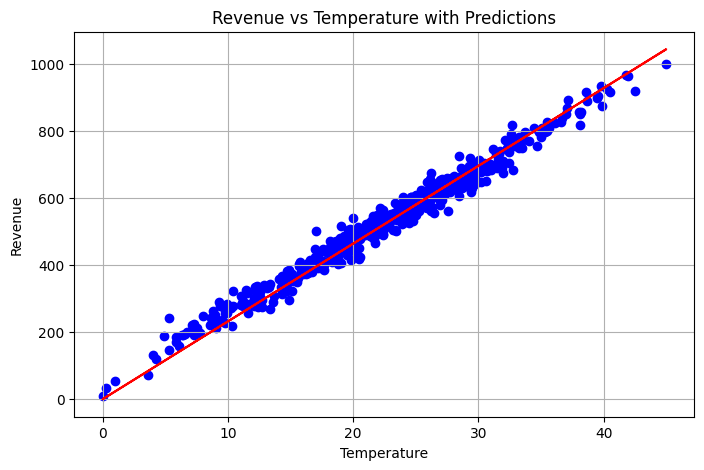

In [18]:
# Now we will plot this regression prediction
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title("Revenue vs Temperature with Predictions")
plt.grid(True)